## FORMATIVE ASSESSMENT : UNSUPERVISED LEARNING

The objective of this project is to evaluate the  understanding and application of clustering techniques using the Iris dataset.In the dataset we will , preprocess it, and apply two clustering algorithms- (KMeans and Hierarchical clustering). The results will be visualized to understand the clusters formed by each method.

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
#First we import the dataset  from skleran
from sklearn.datasets import load_iris

In [44]:
#Loading the dataset
iris=load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [45]:
# Displaying the basic informations about the dataset and finding the null values
print(df.info())
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [46]:
#showing the dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [47]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [48]:
#printing the shape of the dataset
print(df.shape)

(150, 4)


In [49]:
#printing the size
df.size

600

In [50]:
#Describing the dataset
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


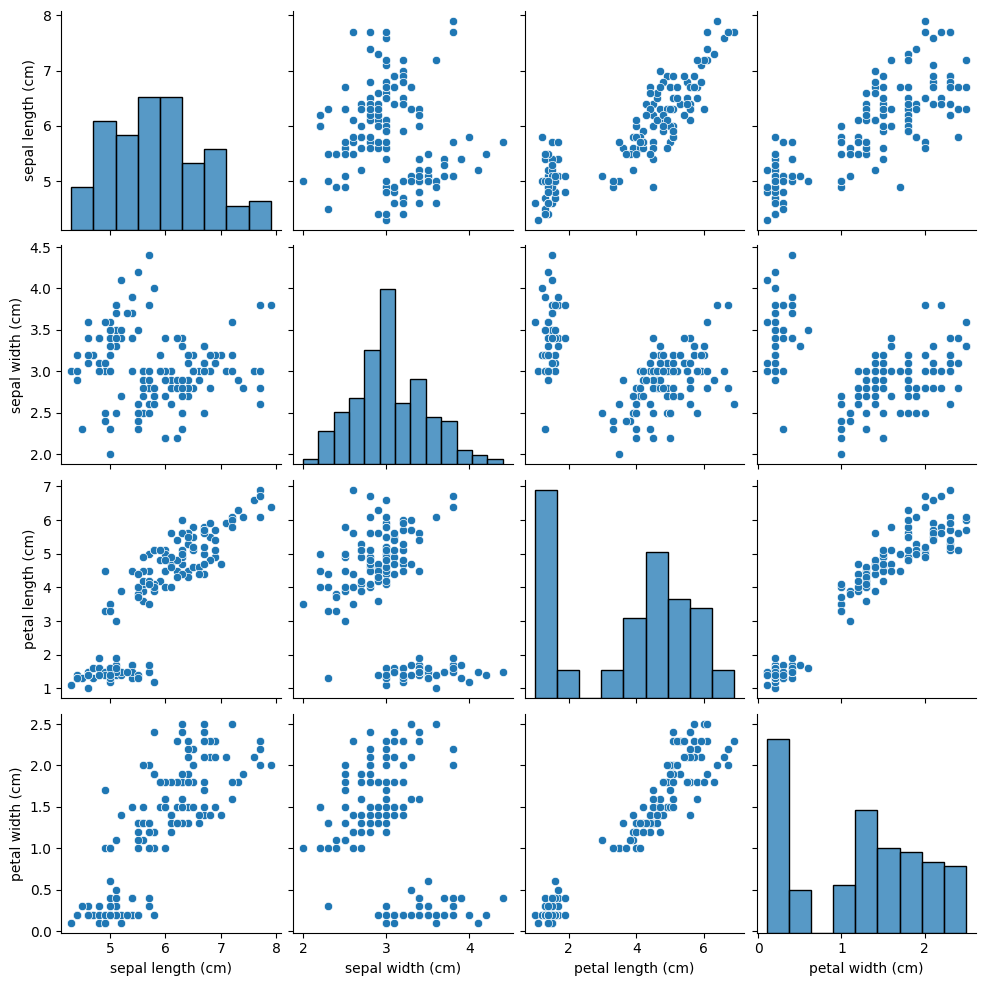

In [51]:
#Showing the pairplot from the dataset
sns.pairplot(df)
plt.show()

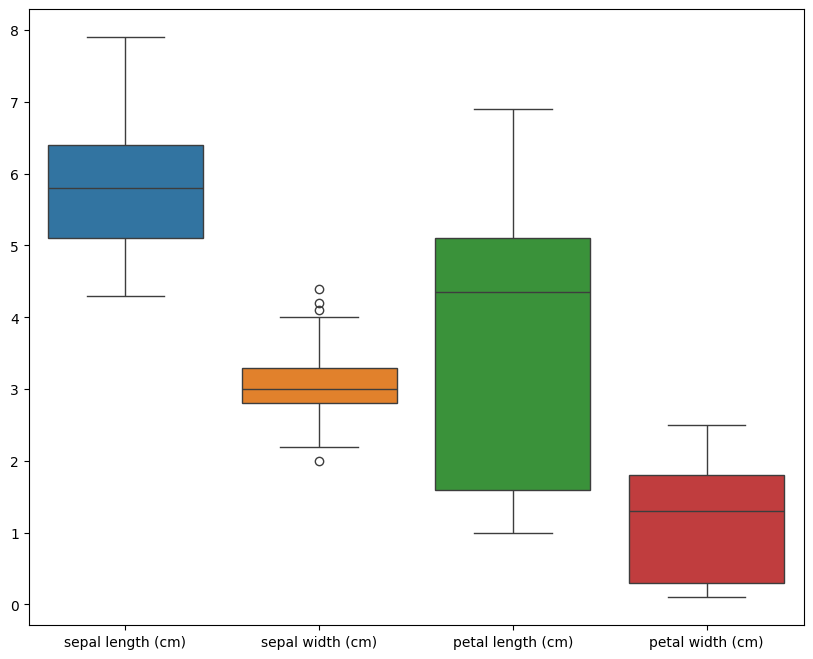

In [52]:
#showing boxplot for finding the outliers
plt.figure(figsize=(10,8))
plt.subplot(1,1,1)
sns.boxplot(df)
plt.show()

The above boxplot shows that Here, the ouliers are present in column 'sepal_width'

In [53]:
#finding the outliers by using IQR method
sepal_wid_Q1=df['sepal width (cm)'].quantile(0.25)
sepal_wid_Q3=df['sepal width (cm)'].quantile(0.75)
sepal_wid_IQR=sepal_wid_Q3-sepal_wid_Q1

#printing 
print('Q1=',sepal_wid_Q1)
print('Q3=',sepal_wid_Q3)

Q1= 2.8
Q3= 3.3


In [54]:
#Finding the threshold
T1=sepal_wid_Q1-1.5*sepal_wid_IQR
T3=sepal_wid_Q3+1.5*sepal_wid_IQR
#finding the outliers
outliers_sepal_wid=df[(df['sepal width (cm)']<T1)|(df['sepal width (cm)']>T3)]
outliers_sepal_wid

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
15,5.7,4.4,1.5,0.4
32,5.2,4.1,1.5,0.1
33,5.5,4.2,1.4,0.2
60,5.0,2.0,3.5,1.0


In [55]:
#Cleaned dataset after removing the outliers
df_cleaned=df[(df['sepal width (cm)']>T1)&(df['sepal width (cm)']<T3)]
df_cleaned

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


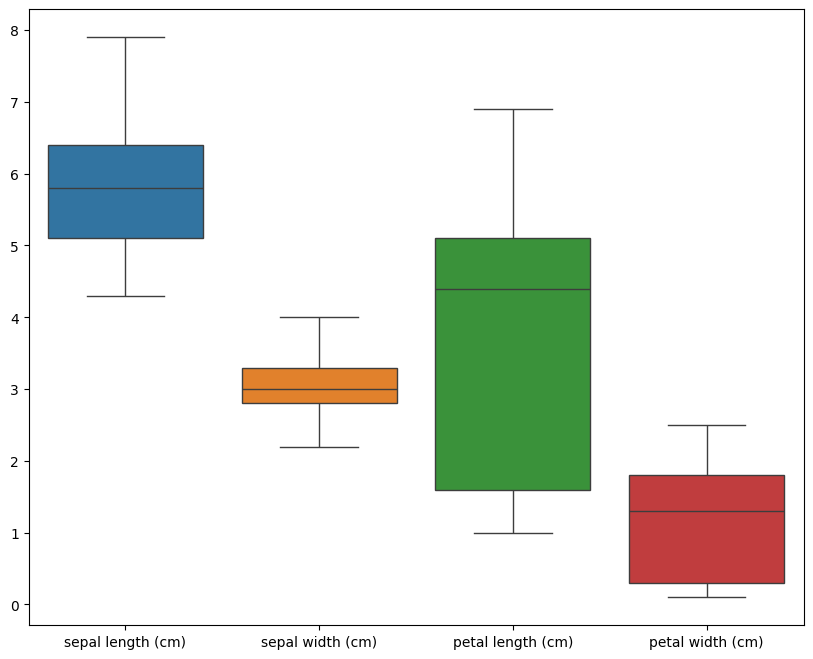

In [56]:
#After removing the outliers and Re-checking any outliers are there
plt.figure(figsize=(10,8))
plt.subplot(1,1,1)
sns.boxplot(df_cleaned)
plt.show()

Here showing that all outliers are removed from the dataset

In [58]:
#Checking the duplicates from the dataset
df.duplicated().sum()

1

In [59]:
#After finding the duplicates then dropping the duplicates from the dataset
df = df.drop_duplicates()

In [60]:
#Rechecking the duplicates 
df.duplicated().sum()

0

In [61]:
#Renaming the colums names 
df_cleaned = df_cleaned.rename(
    columns={'sepal length (cm)': 'sepal_length',
             'sepal width (cm)' : 'sepal_width',
             'petal length (cm)' : 'petal_length',
             'petal width (cm)' : 'petal_width'})

## KMeans Clustering 

Implement the following  clustering algorithms: KMeans

 KMeans clustering is an unsupervised learning algorithm ,It iteratively assigns data points to the nearest cluster center and updates the cluster centers by minimizing the variance within each cluster. The algorithm requires the number of clusters (K) to be specified beforehand.

Text(0, 0.5, 'sepal width')

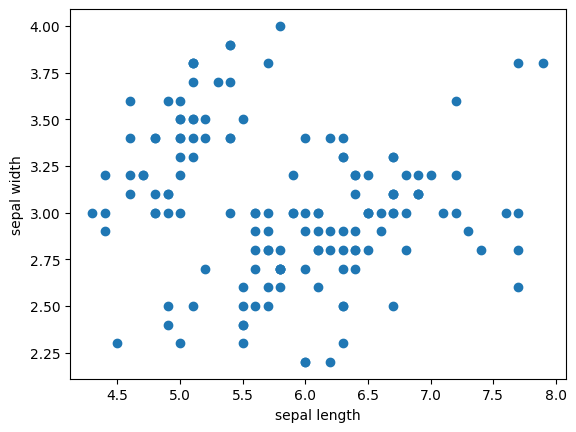

In [62]:
#Visualizing the scatter plot
# Plotting
plt.scatter(df_cleaned.sepal_length, df_cleaned.sepal_width)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
 

This scatter plot shows the relationship between two variables that are  sepal length and sepal width Each point on the plot represents a sample from the dataset with its position determined by the values of sepal length and sepal width for that sample.
The plot provides a visual representation to show how these two variables relate to each other across all samples.

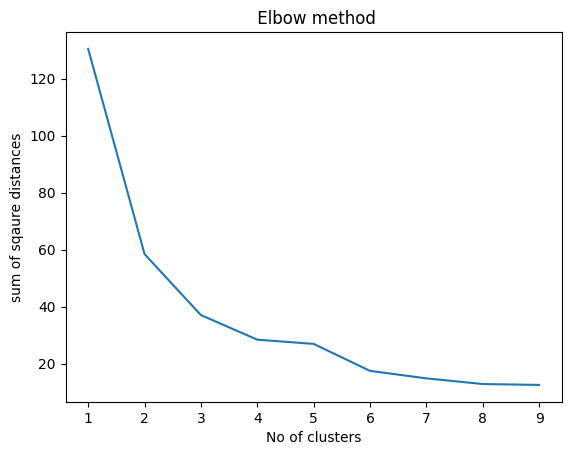

In [74]:
#Visualizing the Elbow method

wss = []   # within cluster sum of sqaures
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init = 'k-means++',random_state=42)
    kmeans.fit(df_cleaned)
    wss.append(kmeans.inertia_) 
    
# Plotting 
plt.plot(range(1,10),wss)
plt.title(' Elbow method')
plt.xlabel('No of clusters')
 
plt.ylabel('sum of sqaure distances')
plt.show()

The above plot showing the Elbow method. That the elbow point appears to be at ( k = 3 ). This suggests that 3 clusters are the optimal number for the Iris dataset.

In [65]:
#Importing the silhouette from the library to find the no of clusters
from sklearn.metrics import silhouette_score
sil_score = []
k_rng = range(2,11)
for i in k_rng:
    kmeans = KMeans(n_clusters=i)
    km_pred = kmeans.fit_predict(df_cleaned)
    sil_score.append(silhouette_score(df_cleaned, km_pred))
sil_score

[0.6869064108277657,
 0.5542769562172648,
 0.41681560274684637,
 0.4935298865998313,
 0.3689696911354071,
 0.280498987754916,
 0.42784648398751673,
 0.2822897552446111,
 0.2655072954744483]

The silhouette score that we can see the no of clusters will be 2. But as per elbow method and domain knowledge we can take 3 as number of clusters

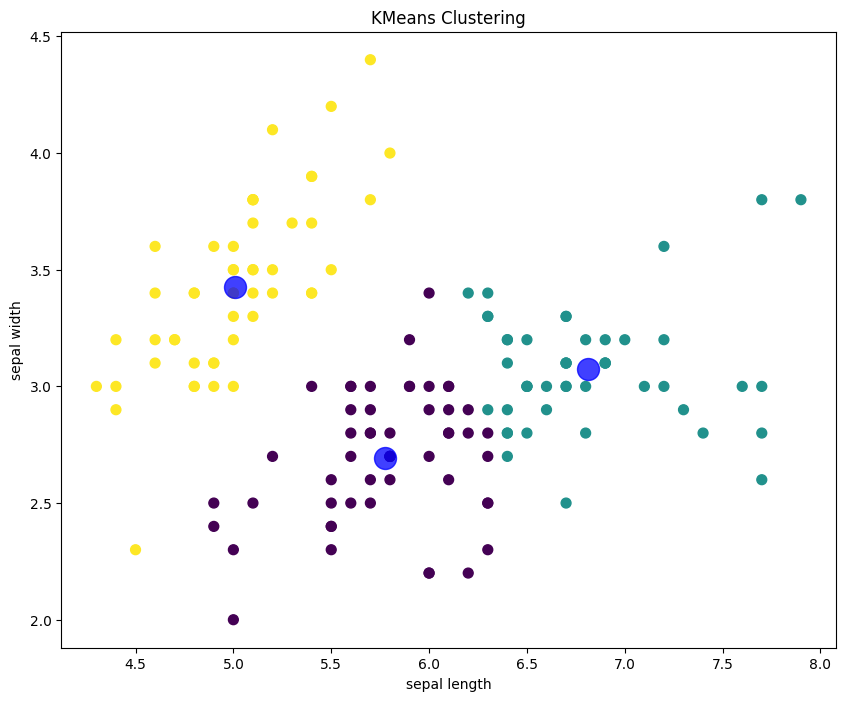

In [66]:
#Apply KMeans clustering to the preprocessed Iris dataset and visualize the clusters.
# Loading the  dataset
df_cleaned = iris.data[:, :2]  # Use only the first two features for simplicity
kmeans = KMeans(n_clusters=3, random_state=0)
y_kmeans = kmeans.fit_predict(df_cleaned)

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(df_cleaned[:, 0], df_cleaned[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=250, alpha=0.75)
plt.title("KMeans Clustering")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.show()


This plot shows the results of applying the KMeans clustering algorithm. The different colored points represent different clusters. Each cluster groups together show the data points that are similar to each other based on their features.This visualization helps in understanding how the data points are grouped based on their sepal features.

## Hierarchy Algorithm

Hierarchical clustering is a technique that showsthe  hierarchy of clusters. It can be agglomerative (bottom-up) or divisive (top-down). Agglomerative clustering starts with each data point as a separate cluster and merges them iteratively until all points belong to a single cluster.Hierarchical clustering is useful for exploring data when the number of clusters is not known in advance. It provides a dendrogram, which is a tree-like diagram that shows the arrangement of the clusters formed at each stage

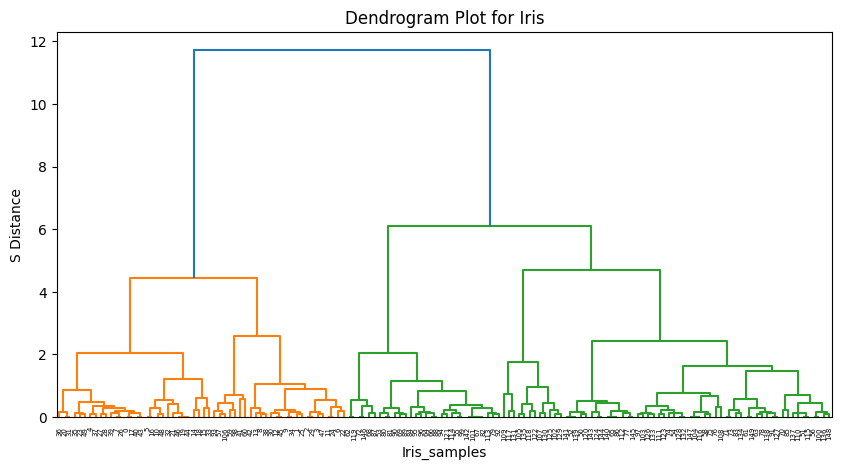

In [75]:
# Importing hierarchy 
import scipy.cluster.hierarchy as shc
 
# Calculating and create the dendrogram
plt.figure(figsize=(10, 5))
linked = shc.linkage(df_cleaned, method="ward")
dendro = shc.dendrogram(linked)

 # Dendrogram plotting
plt.title("Dendrogram Plot for Iris")
plt.ylabel("S Distance")
plt.xlabel("Iris_samples")
plt.show()

This is  Dendrogram plot and it shows the visualizing of  iris samples distances 

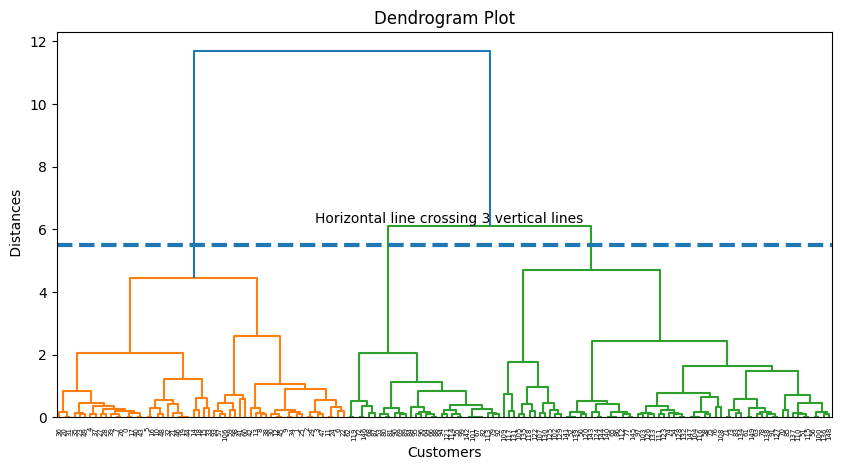

In [76]:
#Plotting
plt.figure(figsize=(10, 5))
dendro = shc.dendrogram(linked)
plt.hlines(y=5.5,xmin=0,xmax=1500,lw=3,linestyles='--')
plt.text(x=500,y=6.2,s='Horizontal line crossing 3 vertical lines')
plt.title("Dendrogram Plot")
plt.ylabel(" Distances")
plt.xlabel("Customers")
plt.show()

This Dendrogram shows that in the plot there is  a horizontal line is appear in the dendrogram to identity  the number of clusters

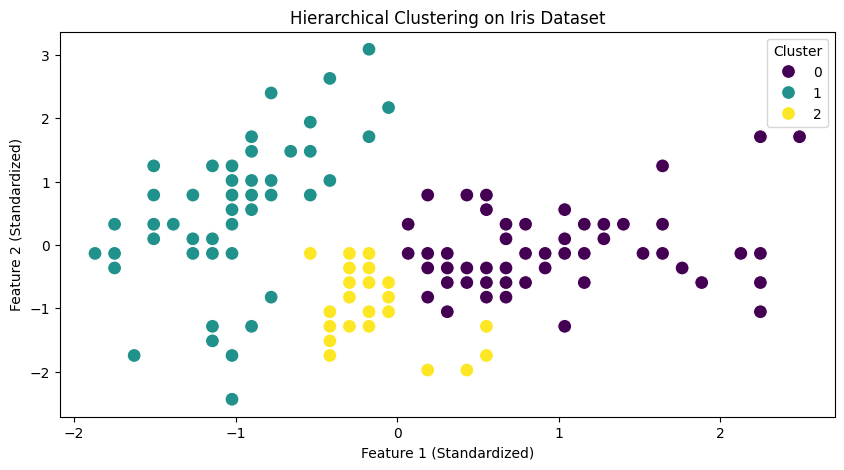

In [72]:
# Importing the Standardscaler from sklearn
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned)
 
# Apply Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
hierarchical_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_hc = hierarchical_clustering.fit_predict(df_cleaned)
 
# Plotting
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=y_hc, palette='viridis',s=100)
plt.title("Hierarchical Clustering ")
plt.xlabel("Feature 1 ")
plt.ylabel("Feature 2")
plt.legend(title='Cluster')
plt.show()


This scatter plot shows the hierarchary clustering from the iris dataset .And it shows the number of clusters providing with various colors to identity  

In [73]:
#Calculating the silhouette anaylsis
sa = []
for k in k_rng:
    hc=AgglomerativeClustering(n_clusters=k)
    hc_pred=hc.fit_predict(df_cleaned)
    sa.append(silhouette_score(df_cleaned, hc_pred))
 
sa

[0.47767996898758924,
 0.3653346819163389,
 0.3823159421185043,
 0.38724618388871174,
 0.39180003578295014,
 0.3444958936522699,
 0.3279936465765686,
 0.35203175409885984,
 0.36717791299216496]